# Notebook 1.1 -- Background Mathematics

Machine Learning is all about the math. Mathematics is not a spectator sport! Got to get your hands dirty. 

In [2]:
# Numpy is a library that does math in python
import numpy as np
# Matplotlib is the plotting library for python
import matplotlib.pyplot as plt

# Linear Functions

We will be using the term linear equation to mean a weighted sum of inputs plus an offset. 

If there is just one input, then this is a straight line:

$ y = \beta + \omega x $

For two inputs, $x_1$ and $x_2$, it would be: 

$ y = \beta + \omega_1 x_1 + \omega_2 x_2 $


Any other functions are by definition, non-linear. 

In [3]:
# Define a linear function with just one input, x
def linear_function_1D(x,beta,omega):
  y = omega*x+beta
  return y

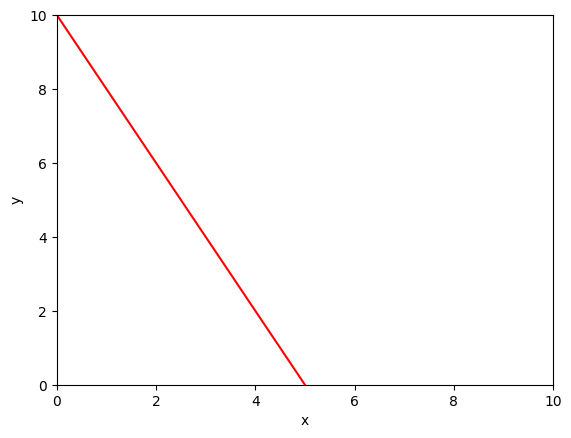

In [8]:
# Plot the 1D linear function

# Define an array of x values from 0 to 10 with increments of 0.01
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html

x = np.arange(0.0,10.0, 0.01)

# Compute y using the function you filled in above
beta = 10.0; omega = -2.0
y = linear_function_1D(x,beta,omega)

# Plot this function
fig, ax = plt.subplots() 
ax.plot(x,y,'r-')
ax.set_ylim([0,10]); ax.set_xlim([0,10])
ax.set_xlabel('x'); ax.set_ylabel('y')
plt.show()


Now let's investigate a 2D Linear Function

In [ ]:
# Code to draw 2D function 

def draw_2D_function(x1_mesh, x2_mesh, y):
    fig, ax = plt.subplots()
    fig.set_size_inches(7,7)
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    fig.colorbar(pos, ax=ax)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')
    plt.show()



In [ ]:
# Define a linear function with two inputs, x1 and x2
def linear_function_2D(x1,x2,beta,omega1,omega2):
  y = x1*omega1+x2*omega2+beta
  return y

In [ ]:
# Plot the 2D function

# Make 2D array of x and y points
x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# Compute the 2D function for given values of omega1, omega2
beta = 0.0; omega1 = 1.0; omega2 = -0.5
y  = linear_function_2D(x1,x2,beta, omega1, omega2)

# Draw the function.
# Color represents y value (brighter = higher value)
# Black = -10 or less, White = +10 or more
# 0 = mid orange
# Lines are contours where value is equal
draw_2D_function(x1,x2,y)

# TODO
# Predict what this plot will look like if you set omega_1 to zero
# Change the code and see if you are right.

# TODO
# Predict what this plot will look like if you set omega_2 to zero
# Change the code and see if you are right.

# TODO
# Predict what this plot will look like if you set beta to -5
# Change the code and see if you are correct

Often we want to computer many linear functions at the same time. 
For example, we might have three inputs $x_1$, $x_2$, and $x_3$ and want to computer two linear functions giving $y_1$ and $y_2$

We could do this by running each equation separately, 

\begin{equation}
y_1 = \beta_1 + \omega_{11}x_1 + \omega_{12}x_2 + \omega_{13}x_3 
\end{equation}

\begin{equation}
y_2 = \beta_2 + \omega_{21}x_1 + \omega_{22}x_2 + \omega_{23}x_3
\end{equation}

However, we can write it more compactly with vectors and matricies:

\begin{equation}
\begin{bmatrix}
y_1 \\
y_2 
\end{bmatrix}
=
\begin{bmatrix}
\beta_1 \\
\beta_2 
\end{bmatrix}
+
\begin{bmatrix}
\omega_{11} & \omega_{12} & \omega_{13} \\
\omega_{21} & \omega_{22} & \omega_{23} 
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
\end{equation}

In [ ]:
# Define a linear function with three inputs, x1, x2, and x_3
def linear_function_3D(x1,x2,x3,beta,omega1,omega2,omega3):
  # TODO -- replace the code below with formula for a single 3D linear equation
  y = x1*omega1+x2*omega2*x3*omega3+beta
  return y

In [ ]:
# Define the parameters
beta1 = 0.5; beta2 = 0.2
omega11 =  -1.0 ; omega12 = 0.4; omega13 = -0.3
omega21 =  0.1  ; omega22 = 0.1; omega23 = 1.2

# Define the inputs
x1 = 4 ; x2 =-1; x3 = 2

# Compute using the individual equations
y1 = linear_function_3D(x1,x2,x3,beta1,omega11,omega12,omega13)
y2 = linear_function_3D(x1,x2,x3,beta2,omega21,omega22,omega23)
print("Individual equations")
print('y1 = %3.3f\ny2 = %3.3f'%((y1,y2)))

# Define vectors and matrices
beta_vec = np.array([[beta1],[beta2]])
omega_mat = np.array([[omega11,omega12,omega13],[omega21,omega22,omega23]])
x_vec = np.array([[x1], [x2], [x3]])

# Compute with vector/matrix form
y_vec = beta_vec+np.matmul(omega_mat, x_vec)
print("Matrix/vector form")
print('y1= %3.3f\ny2 = %3.3f'%((y_vec[0],y_vec[1])))